# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import datetime, date, time, timedelta
import calendar

In [ ]:
data_2019 = pd.read_csv('Datasets/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets/flujo-vehicular-2017.csv', sep =',')

In [ ]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [ ]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [ ]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [ ]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [ ]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [ ]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [ ]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [ ]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   hora_inicio     int64 
 3   hora_fin        int64 
 4   dia             object
 5   estacion        object
 6   sentido         object
 7   tipo_vehiculo   object
 8   forma_pago      object
 9   cantidad_pasos  int64 
dtypes: int64(4), object(6)
memory usage: 298.8+ MB


# Comencemos revisando la distribución de los datos

### Distribucion por Forma de Pago

Text(0.5, 0, 'Forma Pago')

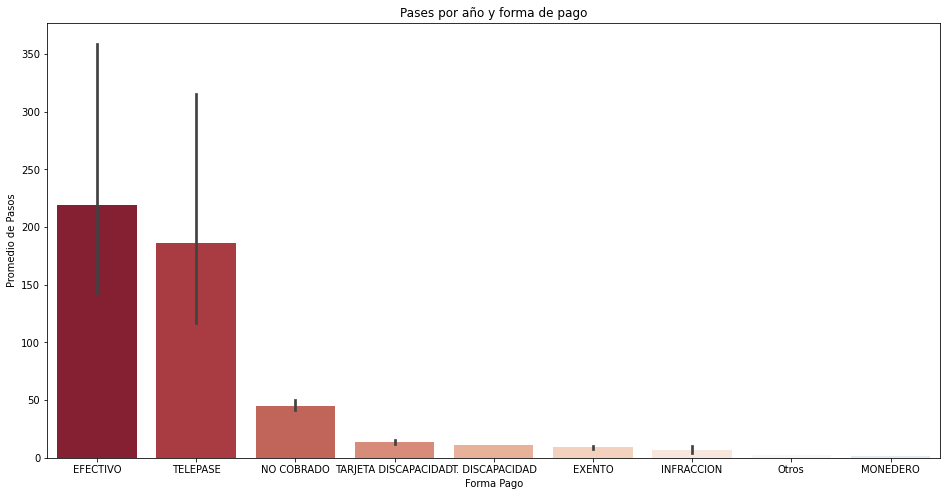

In [ ]:
# Graficamos distribucion por estacion y año
from matplotlib.pyplot import show
dataset_forma_pago=pd.DataFrame(dataset.groupby([dataset.forma_pago, dataset.periodo])['cantidad_pasos'].mean()).reset_index()
dataset_forma_pago=dataset_forma_pago.sort_values(by='cantidad_pasos' ,ascending = False)
plt.figure(figsize=(16,8))
g=sns.barplot(data=dataset_forma_pago,y='cantidad_pasos', x='forma_pago',  palette =sns.color_palette("RdBu",15))
#plt.set_xticklabel( rotation=90) # Rotate labels
plt.title("Pases por año y forma de pago")
plt.ylabel('Promedio de Pasos')
plt.xlabel('Forma Pago')

Text(0.5, 0, 'Año')

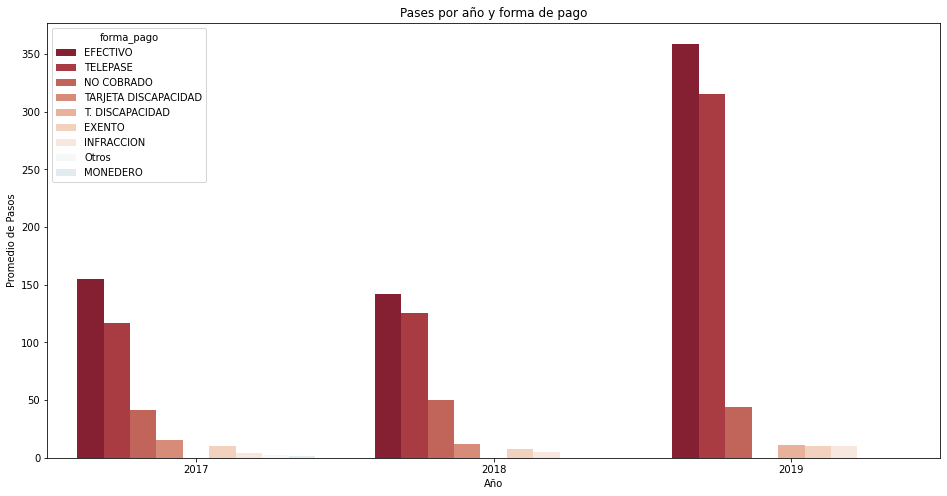

In [ ]:
# Graficamos distribucion por estacion y año
from matplotlib.pyplot import show
dataset_forma_pago=pd.DataFrame(dataset.groupby([dataset.forma_pago, dataset.periodo])['cantidad_pasos'].mean()).reset_index()
dataset_forma_pago=dataset_forma_pago.sort_values(by='cantidad_pasos' ,ascending = False)
plt.figure(figsize=(16,8))
g=sns.barplot(data=dataset_forma_pago,y='cantidad_pasos', x='periodo', hue='forma_pago', palette =sns.color_palette("RdBu",15))
#plt.set_xticklabel( rotation=90) # Rotate labels
plt.title("Pases por año y forma de pago")
plt.ylabel('Promedio de Pasos')
plt.xlabel('Año')

###### La forma de pago que mas se ha usado en todos los periodo es Efectivo

### Hagamos una exploracion del trasito por estación y periodo

In [ ]:
dataset_completo_año=pd.DataFrame(dataset.groupby([dataset.estacion, dataset.periodo])['cantidad_pasos'].mean()).reset_index()
dataset_completo_año['Descripcion']=dataset_completo_año["estacion"]+" - "+dataset_completo_año["periodo"].astype(str)
dataset_completo_año.info()
dataset_completo_año

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   estacion        24 non-null     object 
 1   periodo         24 non-null     int64  
 2   cantidad_pasos  24 non-null     float64
 3   Descripcion     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 896.0+ bytes


,estacion,periodo,cantidad_pasos,Descripcion
0,Alberdi,2017,38.447328,Alberdi - 2017
1,Alberdi,2018,37.473565,Alberdi - 2018
2,Alberti,2019,42.572147,Alberti - 2019
3,Avellaneda,2017,129.673669,Avellaneda - 2017
4,Avellaneda,2018,125.902688,Avellaneda - 2018
5,Avellaneda,2019,259.079853,Avellaneda - 2019
6,Dellepiane,2019,156.159104,Dellepiane - 2019
7,Dellepiane Centro,2017,88.156123,Dellepiane Centro - 2017
8,Dellepiane Centro,2018,87.175054,Dellepiane Centro - 2018
9,Dellepiane Liniers,2017,83.699600,Dellepiane Liniers - 2017


Text(0.5, 0, 'Promedio de Pasos')

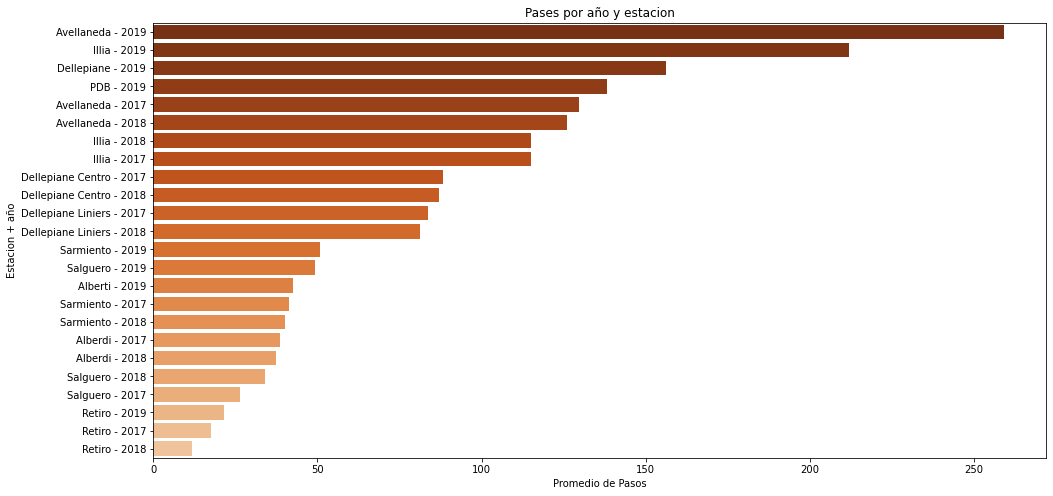

In [ ]:
# Graficamos distribucion por estacion y año
from matplotlib.pyplot import show
dataset_completo_año=dataset_completo_año.sort_values(by='cantidad_pasos' ,ascending = False)
plt.figure(figsize=(16,8))
g=sns.barplot(y=dataset_completo_año.Descripcion, x=dataset_completo_año.cantidad_pasos, palette =sns.color_palette("Oranges_r",33))
#plt.set_xticklabel( rotation=90) # Rotate labels
plt.title("Pases por año y estacion")
plt.ylabel('Estacion + año')
plt.xlabel('Promedio de Pasos')

###### Por lo que se aprecia, las estaciones mas transitadas fueron en 2019, ya que vemos que estan primeras, y 2019 siempre aparece antes que 2018 y 2017

Text(0.5, 0, 'Promedio Pasos')

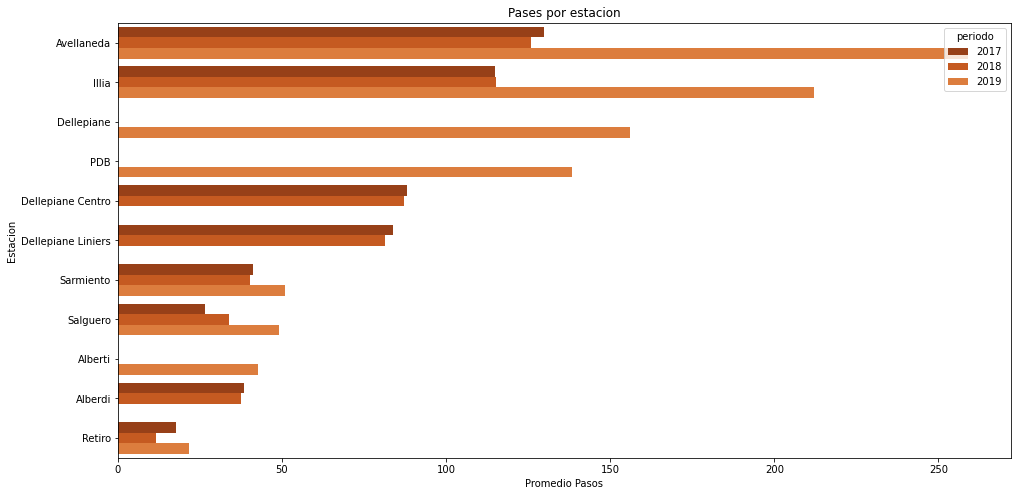

In [ ]:
# Graficamos distribucion por estacion y año
from matplotlib.pyplot import show
dataset_completo_año=dataset_completo_año.sort_values(by='cantidad_pasos' ,ascending = False)
plt.figure(figsize=(16,8))
g=sns.barplot(y='estacion', x='cantidad_pasos', hue='periodo', data=dataset_completo_año, palette =sns.color_palette("Oranges_r"))
#plt.set_xticklabel( rotation=90) # Rotate labels
plt.title("Pases por estacion")
plt.ylabel('Estacion')
plt.xlabel('Promedio Pasos')


Text(0.5, 0, 'Promedio Pasos')

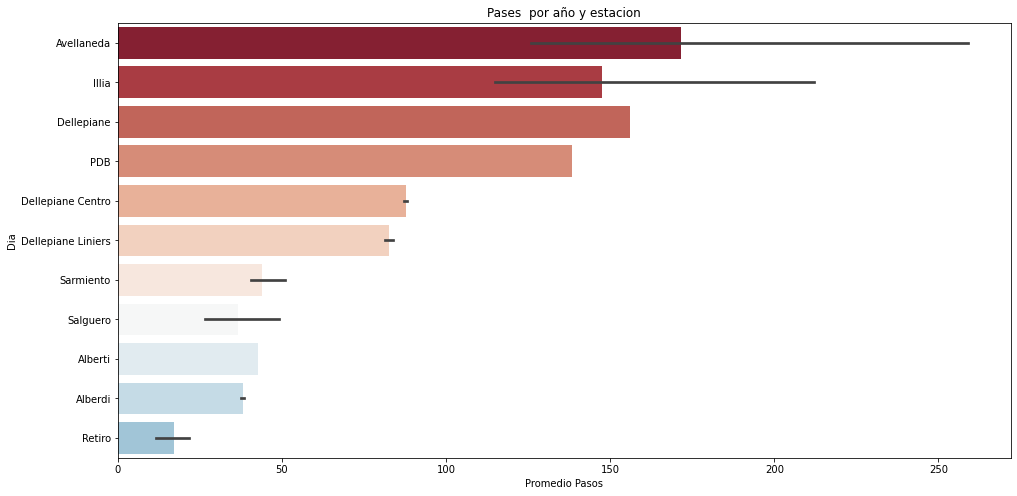

In [ ]:
# Graficamos distribucion por estacion
from matplotlib.pyplot import show
dataset_completo_año=dataset_completo_año.sort_values(by='cantidad_pasos' ,ascending = False)
plt.figure(figsize=(16,8))
g=sns.barplot(y=dataset_completo_año.estacion, x=dataset_completo_año.cantidad_pasos, palette =sns.color_palette("RdBu",15))
#plt.set_xticklabel( rotation=90) # Rotate labels
plt.title("Pases  por año y estacion")
plt.ylabel('Dia')
plt.xlabel('Promedio Pasos')

Text(0.5, 0, 'Año')

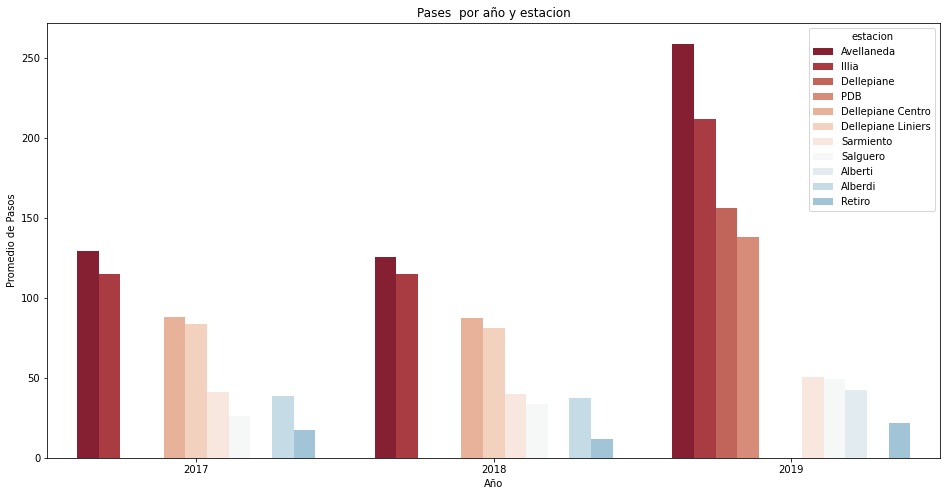

In [ ]:
# Graficamos distribucion por estacion y año
from matplotlib.pyplot import show
dataset_completo_año=dataset_completo_año.sort_values(by='cantidad_pasos' ,ascending = False)
plt.figure(figsize=(16,8))
g=sns.barplot(data=dataset_completo_año,y='cantidad_pasos', x='periodo', hue='estacion', palette =sns.color_palette("RdBu",15))
#plt.set_xticklabel( rotation=90) # Rotate labels
plt.title("Pases  por año y estacion")
plt.ylabel('Promedio de Pasos')
plt.xlabel('Año')

### Analicemos la distribucion de las variables por Año

In [ ]:
dataset_Liviano=dataset[(dataset.tipo_vehiculo=="Liviano")]
dataset_Pesado=dataset[(dataset.tipo_vehiculo=="Pesado")]

<Figure size 1080x360 with 0 Axes>

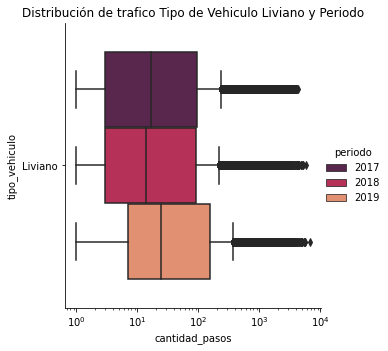

<Figure size 1080x360 with 0 Axes>

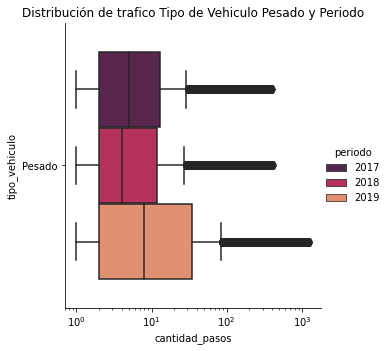

In [ ]:
# Graficamos distribucion por sentido y dia
from matplotlib.pyplot import show
plt.figure(figsize=(15,5))
g=sns.catplot(data=dataset_Liviano, y='tipo_vehiculo', x='cantidad_pasos',kind="box", orient="h", height=4.5, aspect=1, hue='periodo',palette =sns.color_palette("rocket",3))
g.set(xscale="log")
plt.title("Distribución de trafico Tipo de Vehiculo Liviano y Periodo")


# Graficamos distribucion por sentido y dia
from matplotlib.pyplot import show
plt.figure(figsize=(15,5))
g1=sns.catplot(data=dataset_Pesado, y='tipo_vehiculo', x='cantidad_pasos',kind="box", orient="h", height=4.5, aspect=1, hue='periodo',palette =sns.color_palette("rocket",3))
plt.title("Distribución de trafico Tipo de Vehiculo Pesado y Periodo")
g1.set(xscale="log")


En esta distribucion observamos como en 2019 impacto los limites de la distribucion , teniendo en cuenta ue observamos que crecio el transito en ese periodo.

<Figure size 1080x360 with 0 Axes>

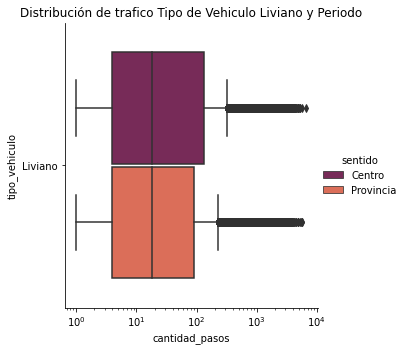

<Figure size 1080x360 with 0 Axes>

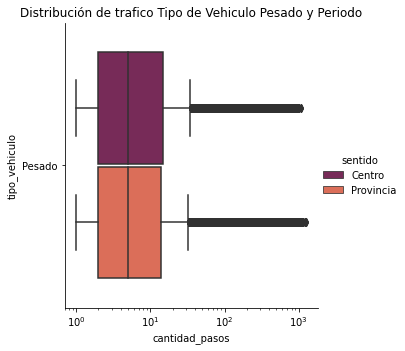

In [ ]:
# Graficamos distribucion por sentido y dia
from matplotlib.pyplot import show
plt.figure(figsize=(15,5))
g=sns.catplot(data=dataset_Liviano, y='tipo_vehiculo', x='cantidad_pasos',kind="box", orient="h", height=4.5, aspect=1, hue='sentido',palette =sns.color_palette("rocket",2))
g.set(xscale="log")
plt.title("Distribución de trafico Tipo de Vehiculo Liviano y Periodo")


# Graficamos distribucion por sentido y dia
from matplotlib.pyplot import show
plt.figure(figsize=(15,5))
g1=sns.catplot(data=dataset_Pesado, y='tipo_vehiculo', x='cantidad_pasos',kind="box", orient="h", height=4.5, aspect=1, hue='sentido',palette =sns.color_palette("rocket",2))
plt.title("Distribución de trafico Tipo de Vehiculo Pesado y Periodo")
g1.set(xscale="log")

<Figure size 1080x360 with 0 Axes>

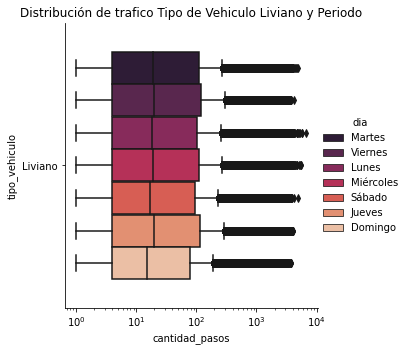

<Figure size 1080x360 with 0 Axes>

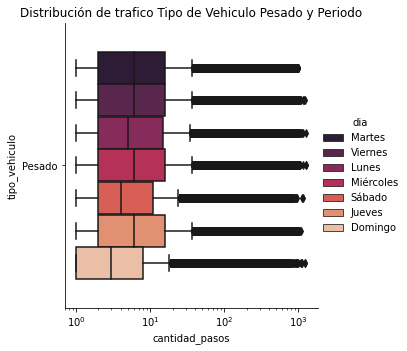

In [ ]:
# Graficamos distribucion por sentido y dia
from matplotlib.pyplot import show
plt.figure(figsize=(15,5))
g=sns.catplot(data=dataset_Liviano, y='tipo_vehiculo', x='cantidad_pasos',kind="box", orient="h", height=4.5, aspect=1, hue='dia',palette =sns.color_palette("rocket",7))
g.set(xscale="log")
plt.title("Distribución de trafico Tipo de Vehiculo Liviano y Periodo")


# Graficamos distribucion por sentido y dia
from matplotlib.pyplot import show
plt.figure(figsize=(15,5))
g1=sns.catplot(data=dataset_Pesado, y='tipo_vehiculo', x='cantidad_pasos',kind="box", orient="h", height=4.5, aspect=1, hue='dia',palette =sns.color_palette("rocket",7))
plt.title("Distribución de trafico Tipo de Vehiculo Pesado y Periodo")
g1.set(xscale="log")

### Que pasara con las formas de pago? 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


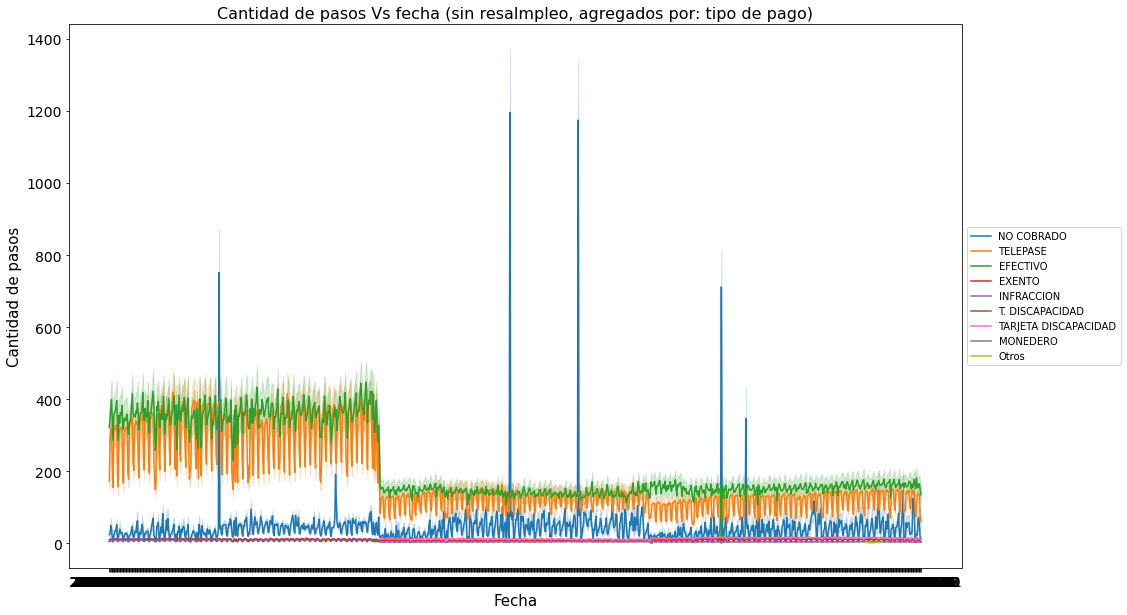

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset, x='fecha', y='cantidad_pasos', hue="forma_pago")

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (sin resalmpleo, agregados por: tipo de pago)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','forma_pago','cantidad_pasos']].groupby(['periodo','forma_pago']).sum().reset_index()
dataset_analisis

,periodo,forma_pago,cantidad_pasos
0,2017,EFECTIVO,69502938
1,2017,EXENTO,1677497
2,2017,INFRACCION,629550
3,2017,MONEDERO,16
4,2017,NO COBRADO,4845670
5,2017,Otros,22
6,2017,TARJETA DISCAPACIDAD,1565099
7,2017,TELEPASE,46612698
8,2018,EFECTIVO,60225521
9,2018,EXENTO,1250539


In [ ]:
dataset_analisis =  dataset[['fecha','periodo','forma_pago','cantidad_pasos']]\
        .groupby(['fecha', 'periodo','forma_pago'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,forma_pago,cantidad_pasos
0,2017-01-01,2017,EFECTIVO,157472
1,2017-01-01,2017,EXENTO,1638
2,2017-01-01,2017,INFRACCION,670
3,2017-01-01,2017,MONEDERO,1
4,2017-01-01,2017,NO COBRADO,5756
...,...,...,...,...
6554,2019-12-31,2019,EXENTO,1817
6555,2019-12-31,2019,INFRACCION,1902
6556,2019-12-31,2019,NO COBRADO,10375
6557,2019-12-31,2019,T. DISCAPACIDAD,1334


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


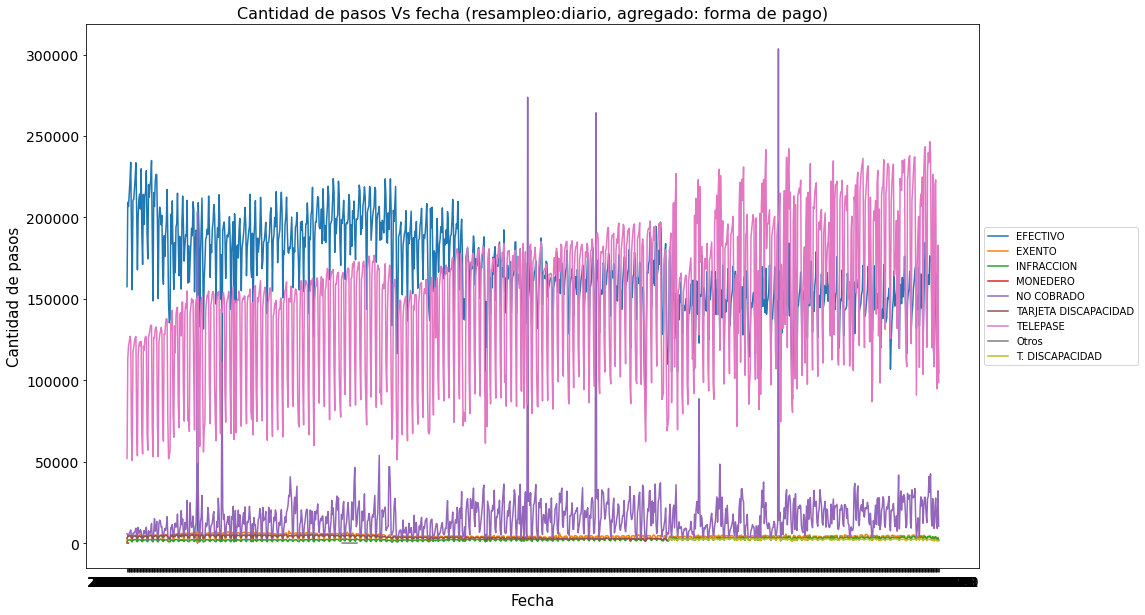

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='forma_pago')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo:diario, agregado: forma de pago)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

###### En esta grafica vemos como la forma de pago Telepase va aumentando en el tiempo, y el ultimo tiempo ha superado a la forma de pago Efectivo

### Analisis por Hora

In [ ]:
dataset_analisis=dataset.groupby([dataset.sentido,dataset.hora_fin])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis

,sentido,hora_fin,cantidad_pasos
0,Centro,0,3309453
1,Centro,1,2538398
2,Centro,2,1906822
3,Centro,3,1355127
4,Centro,4,1090446
5,Centro,5,1505996
6,Centro,6,3669604
7,Centro,7,7918316
8,Centro,8,11801844
9,Centro,9,12434811


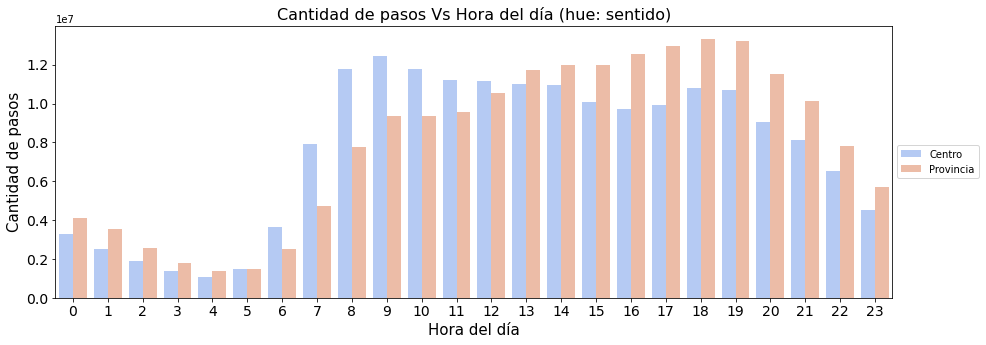

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="hora_fin", 
            y="cantidad_pasos", 
            hue='sentido',
            data=dataset_analisis,
            palette= "coolwarm"
            )
plt.title('Cantidad de pasos Vs Hora del día (hue: sentido)',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

En este grafico podemos ver cuales son los horarios picos, a la mañana y a la tarde, que coincide con la mayoria de la sjornadas laborales y educativas

# Comenzamos a utilizar el Universo de datos que solicita el proyecto 3

In [ ]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

In [ ]:
#dataset['fecha_comp'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
#dataset.fecha + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset.head(10)

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00
5,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EXENTO,1,2019-01-01 01:00:00
6,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,NO COBRADO,276,2019-01-01 01:00:00
7,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,TELEPASE,159,2019-01-01 01:00:00
8,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Pesado,TELEPASE,5,2019-01-01 01:00:00
9,2019,2019-01-01,0,1,Martes,Avellaneda,Provincia,Liviano,EFECTIVO,12,2019-01-01 01:00:00


In [ ]:
dataset['fecha_num'] = dataset.fecha2.map(datetime.toordinal)
dataset.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2,fecha_num
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00,737060
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00,737060
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00,737060
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00,737060
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00,737060


In [ ]:
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2,fecha_num
0,2019,0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00,737060
1,2019,0,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00,737060
2,2019,0,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00,737060
3,2019,0,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00,737060
4,2019,0,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00,737060


In [ ]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha,fecha_num
0,2019,0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00,737060
1,2019,0,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00,737060
2,2019,0,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00,737060
3,2019,0,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00,737060
4,2019,0,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00,737060


In [ ]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head(100)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,fecha_num
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00,737060
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00,737060
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00,737060
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00,737060
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00,737060
...,...,...,...,...,...,...
1940,Viernes,Provincia,Liviano,368,2019-02-01 02:00:00,737091
1945,Viernes,Provincia,Pesado,1,2019-02-01 02:00:00,737091
2005,Viernes,Centro,Liviano,185,2019-02-01 03:00:00,737091
2009,Viernes,Centro,Pesado,7,2019-02-01 03:00:00,737091


In [ ]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
 5   fecha_num       238869 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 10.9+ MB


In [ ]:
# no hay variables correlacionadas, seguramente tendre que encodear los datos para verificar esto
dataset.corr()

,cantidad_pasos,fecha_num
cantidad_pasos,1.000000,0.141732
fecha_num,0.141732,1.000000


# Analicemos el pase de vehiculos por Dia

In [ ]:
# Vamos a generar por dias diferentes cortes de Datasets
print("Dataset Sentido Centro")
dataset_sentido_centro= dataset[(dataset.sentido == "Centro")]
dataset_sentido_centro= dataset_sentido_centro[['cantidad_pasos','dia']].groupby('dia').mean().reset_index()
dataset_sentido_centro=dataset_sentido_centro.sort_values(by='cantidad_pasos' ,ascending = False)
dataset_sentido_centro

Dataset Sentido Centro


,dia,cantidad_pasos
6,Viernes,211.214388
1,Jueves,200.130886
4,Miércoles,195.626284
3,Martes,192.934342
2,Lunes,188.565924
5,Sábado,186.336499
0,Domingo,177.295910


In [ ]:
print("Dataset Sentido Provincia")
dataset_sentido_provincia =  dataset[(dataset.sentido == "Provincia")]
dataset_sentido_provincia = dataset_sentido_provincia[['cantidad_pasos','dia']].groupby('dia').mean().reset_index()
dataset_sentido_provincia = dataset_sentido_provincia.sort_values(by='cantidad_pasos' ,ascending = False)
dataset_sentido_provincia

Dataset Sentido Provincia


,dia,cantidad_pasos
6,Viernes,224.244641
1,Jueves,219.632759
4,Miércoles,212.849929
3,Martes,208.051592
2,Lunes,204.581123
5,Sábado,200.842431
0,Domingo,186.020959


In [ ]:
print("Dataset tipo Vehiculo Liviano")
dataset_Liviano = dataset[(dataset.tipo_vehiculo == "Liviano")]
dataset_Liviano = dataset_Liviano[['cantidad_pasos','dia']].groupby('dia').mean().reset_index()
dataset_Liviano = dataset_Liviano.sort_values(by='cantidad_pasos' ,ascending = False)
dataset_Liviano

Dataset tipo Vehiculo Liviano


,dia,cantidad_pasos
6,Viernes,591.216803
1,Jueves,565.976707
4,Miércoles,550.016412
3,Martes,531.361668
2,Lunes,516.822749
5,Sábado,504.612104
0,Domingo,453.657205


In [ ]:
print("Dataset tipo Vehiculo Pesado")
dataset_pesado = dataset[(dataset.tipo_vehiculo == "Pesado")]
dataset_pesado = dataset_pesado[['cantidad_pasos','dia']].groupby('dia').mean().reset_index()
dataset_pesado = dataset_pesado.sort_values(by='cantidad_pasos' ,ascending = False)
dataset_pesado

Dataset tipo Vehiculo Pesado


,dia,cantidad_pasos
6,Viernes,11.683796
1,Jueves,11.385283
4,Miércoles,11.338323
3,Martes,10.952252
2,Lunes,10.232740
5,Sábado,8.191398
0,Domingo,6.103821


In [ ]:
print("Dataset completo por dia")
dataset_total_diario = dataset[['cantidad_pasos','dia']].groupby('dia').mean().reset_index()
dataset_total_diario = dataset_total_diario.sort_values(by='cantidad_pasos' ,ascending = False)
dataset_total_diario

Dataset completo por dia


,dia,cantidad_pasos
6,Viernes,217.276736
1,Jueves,209.147305
4,Miércoles,203.557378
3,Martes,199.957798
2,Lunes,195.975486
5,Sábado,193.149081
0,Domingo,181.429677


Text(0.5, 0, 'Promedio Pasos')

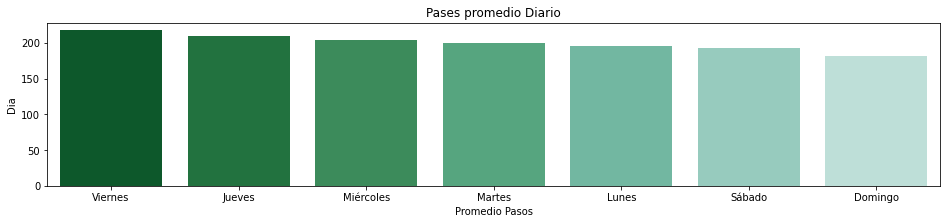

In [ ]:
# Graficamos distribucion por sentido y dia
from matplotlib.pyplot import show
plt.figure(figsize=(16,3))
g=sns.barplot( x=dataset_total_diario.dia, y=dataset_total_diario.cantidad_pasos, palette =sns.color_palette("BuGn_r",9))
#plt.set_xticklabel( rotation=90) # Rotate labels
plt.title("Pases promedio Diario")
plt.ylabel('Dia')
plt.xlabel('Promedio Pasos')

Text(0.5, 1.0, 'Distibución Diaria de trafico sentido Provincia ')

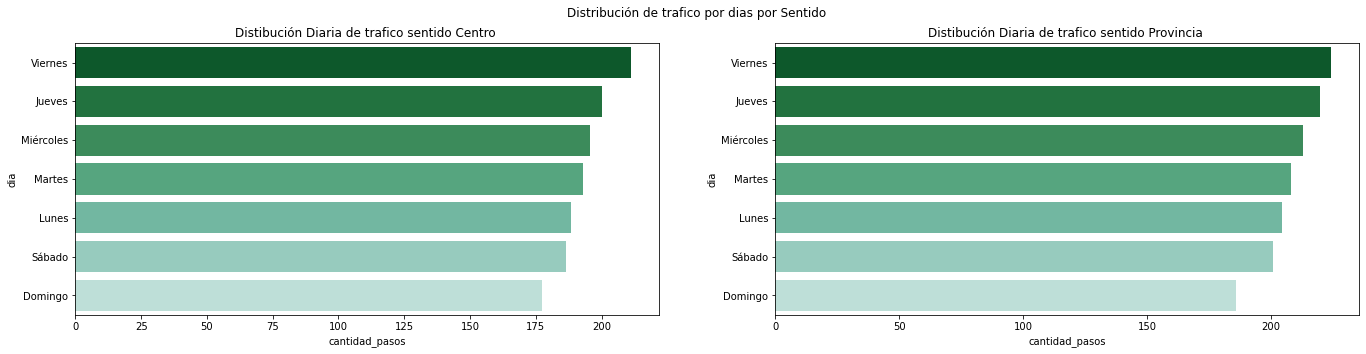

In [ ]:
# Graficamos distribucion por sentido y dia
fig, axes = plt.subplots(1,2, figsize=(23, 5), sharey=False) # Genero la estructura del subplot
fig.suptitle('Distribución de trafico por dias por Sentido') # Creo el titulo

# l2
chart_l2=sns.barplot(ax=axes[0], y=dataset_sentido_centro.dia, x=dataset_sentido_centro.cantidad_pasos, palette =sns.color_palette("BuGn_r",9))
axes[0].set_title("Distibución Diaria de trafico sentido Centro ")

# l2
chart_l1=sns.barplot(ax=axes[1], y=dataset_sentido_provincia.dia, x=dataset_sentido_provincia.cantidad_pasos, palette =sns.color_palette("BuGn_r",9))
axes[1].set_title("Distibución Diaria de trafico sentido Provincia ")


Text(0.5, 1.0, 'Distibución Diaria de trafico Pesado ')

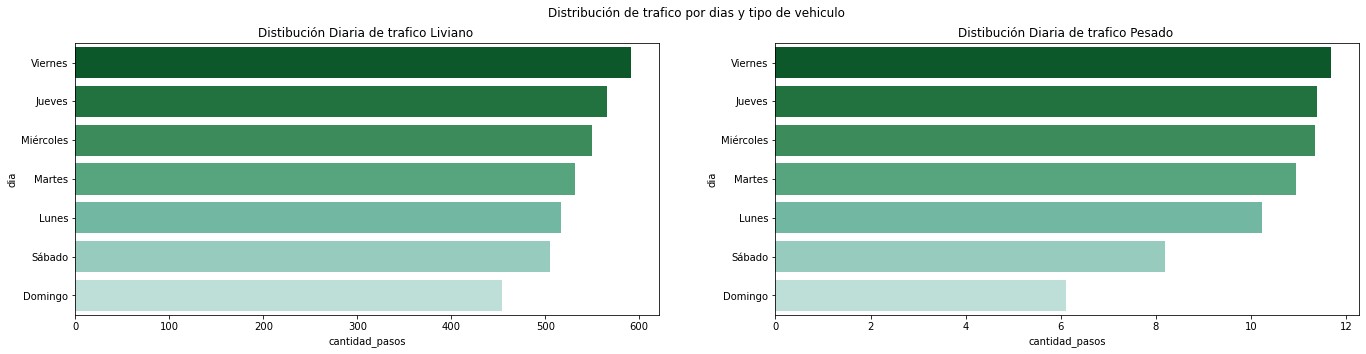

In [ ]:
# Graficamos distribucion por tipo de vehiculo y dia
fig, axes = plt.subplots(1,2, figsize=(23, 5), sharey=False) # Genero la estructura del subplot
fig.suptitle('Distribución de trafico por dias y tipo de vehiculo') # Creo el titulo

# l2
chart_l2=sns.barplot(ax=axes[0], y=dataset_Liviano.dia, x=dataset_Liviano.cantidad_pasos, palette =sns.color_palette("BuGn_r",9))
axes[0].set_title("Distibución Diaria de trafico Liviano ")


# l2
chart_l1=sns.barplot(ax=axes[1], y=dataset_pesado.dia, x=dataset_pesado.cantidad_pasos, palette =sns.color_palette("BuGn_r",9))
axes[1].set_title("Distibución Diaria de trafico Pesado ")


###### En estos graficos podemos verificar que es cierto que los viernes son los dias con mas trafico

In [ ]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 2)


,cantidad_pasos,fecha_num
fecha,,
2017-01-01,31183,170092230
2017-01-02,51568,232680596
2017-01-03,51093,226053924
2017-01-04,53332,236362893
2017-01-05,56486,234154212


In [ ]:
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,fecha_num
0,Domingo,Provincia,Pesado,1,2017-01-01,736330
1,Domingo,Provincia,Liviano,9,2017-01-01,736330
2,Domingo,Provincia,Liviano,644,2017-01-01,736330
3,Domingo,Provincia,Pesado,6,2017-01-01,736330
4,Domingo,Provincia,Pesado,1,2017-01-01,736330


# Buscamos las fechas faltantes 

In [ ]:
#buscamos los dias que no tienen registro, para ellos cargamos el calendario completo
calendario_completo_df = pd.DataFrame(pd.date_range(start='1/1/2017', end='31/12/2019'),columns=['fecha'])
calendario_completo_df.head(10)

,fecha
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
5,2017-01-06
6,2017-01-07
7,2017-01-08
8,2017-01-09
9,2017-01-10


In [ ]:
#merge_validation= dataset.merge(calendario_completo_df, on='fecha', how='left')
merge_validation= calendario_completo_df.merge(dataset, on='fecha', how='left')

In [ ]:
merge_validation.isnull().sum()

fecha              0
dia               10
sentido           10
tipo_vehiculo     10
cantidad_pasos    10
fecha_num         10
dtype: int64

In [ ]:
#merge_validation2.isnull().sum()

In [ ]:
indices_a_reemplazar = merge_validation[merge_validation.cantidad_pasos.isnull()].index
indices_a_reemplazar

Int64Index([1131, 3405, 5875, 6847, 7318, 7515, 7516, 7993, 8413, 9241], dtype='int64')

In [ ]:
merge_validation.iloc[indices_a_reemplazar]

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha_num
1131,2017-04-06,NaN,NaN,NaN,NaN,NaN
3405,2017-11-04,NaN,NaN,NaN,NaN,NaN
5875,2018-06-25,NaN,NaN,NaN,NaN,NaN
6847,2018-09-25,NaN,NaN,NaN,NaN,NaN
7318,2018-11-10,NaN,NaN,NaN,NaN,NaN
7515,2018-11-29,NaN,NaN,NaN,NaN,NaN
7516,2018-11-30,NaN,NaN,NaN,NaN,NaN
7993,2019-02-11,NaN,NaN,NaN,NaN,NaN
8413,2019-05-29,NaN,NaN,NaN,NaN,NaN
9241,2019-12-24,NaN,NaN,NaN,NaN,NaN


In [ ]:
merge_validation.head()

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha_num
0,2017-01-01,Domingo,Provincia,Pesado,1.0,736330.0
1,2017-01-01,Domingo,Provincia,Liviano,9.0,736330.0
2,2017-01-01,Domingo,Provincia,Liviano,644.0,736330.0
3,2017-01-01,Domingo,Provincia,Pesado,6.0,736330.0
4,2017-01-01,Domingo,Provincia,Pesado,1.0,736330.0


In [ ]:
dataset.head(100)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,fecha_num
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,736330
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00,736330
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00,736330
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00,736330
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,736330
...,...,...,...,...,...,...
95,Domingo,Provincia,Liviano,556,2017-01-01 12:00:00,736330
96,Domingo,Centro,Liviano,9,2017-01-01 12:00:00,736330
97,Domingo,Centro,Liviano,510,2017-01-01 12:00:00,736330
98,Domingo,Centro,Pesado,1,2017-01-01 12:00:00,736330


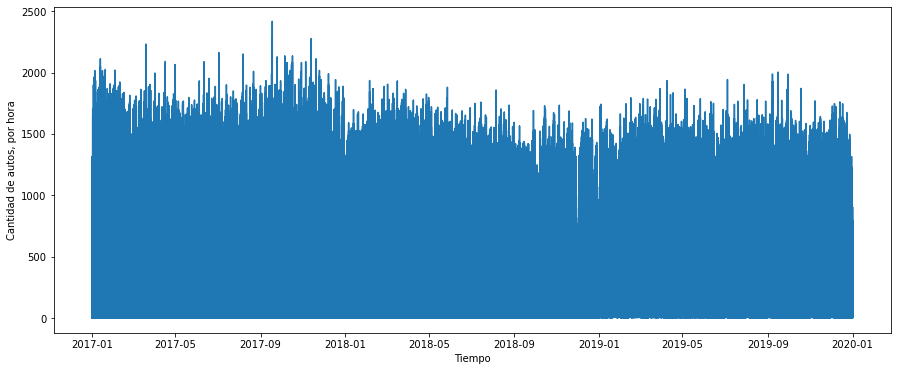

In [ ]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

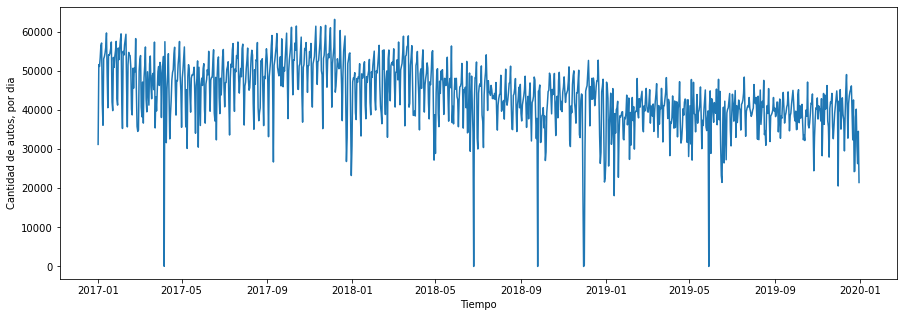

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [ ]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 2)


,cantidad_pasos,fecha_num
fecha,,
2017-01-01,31183,170092230
2017-01-08,347212,1604471696
2017-01-15,366413,1605959679
2017-01-22,357215,1614074735
2017-01-29,354581,1616299175


In [ ]:
#semanal.cantidad_pasos[semanal.cantidad_pasos > 5000000] = np.nan
print(semanal.isna().sum())
#semanal = semanal.interpolate()
print(semanal.isna().sum())

cantidad_pasos    0
fecha_num         0
dtype: int64
cantidad_pasos    0
fecha_num         0
dtype: int64


In [ ]:
ventana = int(365*0.3/7)
semanal_promedio_tendencia = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64

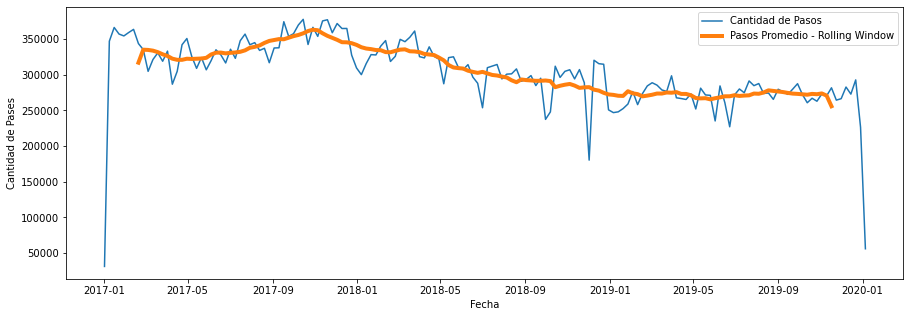

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad de Pasos')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Pasos Promedio - Rolling Window')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pases')
plt.show()

###### En este grafico podemos observar que la tendencia de transito de la estacion illia y pago ene efectivo es decreciente, y puedo deducir que se esta comenzando a pagar con Telepase

# ENCODER

Vamos a encodear infromacion que consideramos relevante para ayudar a nuestra ML

In [ ]:
dataset["date"] =dataset.fecha.dt.date
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,fecha_num,date
0,Domingo,Provincia,Pesado,1,2017-01-01,736330,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01,736330,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01,736330,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01,736330,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01,736330,2017-01-01


In [ ]:
dataset.drop(labels=['fecha'], axis=1, inplace=True)
dataset.rename(columns = {'date':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha_num,fecha
0,Domingo,Provincia,Pesado,1,736330,2017-01-01
1,Domingo,Provincia,Liviano,9,736330,2017-01-01
2,Domingo,Provincia,Liviano,644,736330,2017-01-01
3,Domingo,Provincia,Pesado,6,736330,2017-01-01
4,Domingo,Provincia,Pesado,1,736330,2017-01-01


In [ ]:
dataset.groupby(["fecha","dia","sentido","tipo_vehiculo"])["cantidad_pasos"].sum().reset_index()

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos
0,2017-01-01,Domingo,Centro,Liviano,16681
1,2017-01-01,Domingo,Centro,Pesado,370
2,2017-01-01,Domingo,Provincia,Liviano,13960
3,2017-01-01,Domingo,Provincia,Pesado,172
4,2017-01-02,Lunes,Centro,Liviano,26011
...,...,...,...,...,...
4357,2019-12-30,Lunes,Provincia,Pesado,301
4358,2019-12-31,Martes,Centro,Liviano,10866
4359,2019-12-31,Martes,Centro,Pesado,109
4360,2019-12-31,Martes,Provincia,Liviano,10355


In [ ]:
diario_final = dataset.groupby(["fecha","dia","sentido","tipo_vehiculo"])["cantidad_pasos"].sum().reset_index()
print(diario_final.shape)
diario_final.info()
print(diario_final.head())

(4362, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha           4362 non-null   object
 1   dia             4362 non-null   object
 2   sentido         4362 non-null   object
 3   tipo_vehiculo   4362 non-null   object
 4   cantidad_pasos  4362 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 170.5+ KB
        fecha      dia    sentido tipo_vehiculo  cantidad_pasos
0  2017-01-01  Domingo     Centro       Liviano           16681
1  2017-01-01  Domingo     Centro        Pesado             370
2  2017-01-01  Domingo  Provincia       Liviano           13960
3  2017-01-01  Domingo  Provincia        Pesado             172
4  2017-01-02    Lunes     Centro       Liviano           26011


In [ ]:
diario_final.fecha=pd.to_datetime(diario_final.fecha)

In [ ]:
diario_final["day_num"] = diario_final.fecha.dt.day # Dia
diario_final["month_num"] = diario_final.fecha.dt.month # Mes
diario_final["year_num"] = diario_final.fecha.dt.year # Año
diario_final["Liviano"] =  diario_final["tipo_vehiculo"].apply(lambda x:1 if x =="Liviano" else 0)
diario_final["Pesado"] =  diario_final["tipo_vehiculo"].apply(lambda x:1 if x =="Pesado" else 0)
diario_final["Centro"] =  diario_final["sentido"].apply(lambda x:1 if x =="Centro" else 0)
diario_final["Provincia"] =  diario_final["sentido"].apply(lambda x:1 if x =="Provincia" else 0)

In [ ]:
diario_final.head()

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos,day_num,month_num,year_num,Liviano,Pesado,Centro,Provincia
0,2017-01-01,Domingo,Centro,Liviano,16681,1,1,2017,1,0,1,0
1,2017-01-01,Domingo,Centro,Pesado,370,1,1,2017,0,1,1,0
2,2017-01-01,Domingo,Provincia,Liviano,13960,1,1,2017,1,0,0,1
3,2017-01-01,Domingo,Provincia,Pesado,172,1,1,2017,0,1,0,1
4,2017-01-02,Lunes,Centro,Liviano,26011,2,1,2017,1,0,1,0


In [ ]:
diario_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           4362 non-null   datetime64[ns]
 1   dia             4362 non-null   object        
 2   sentido         4362 non-null   object        
 3   tipo_vehiculo   4362 non-null   object        
 4   cantidad_pasos  4362 non-null   int64         
 5   day_num         4362 non-null   int64         
 6   month_num       4362 non-null   int64         
 7   year_num        4362 non-null   int64         
 8   Liviano         4362 non-null   int64         
 9   Pesado          4362 non-null   int64         
 10  Centro          4362 non-null   int64         
 11  Provincia       4362 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 409.1+ KB


In [ ]:
diario_final.head(20)

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos,day_num,month_num,year_num,Liviano,Pesado,Centro,Provincia
0,2017-01-01,Domingo,Centro,Liviano,16681,1,1,2017,1,0,1,0
1,2017-01-01,Domingo,Centro,Pesado,370,1,1,2017,0,1,1,0
2,2017-01-01,Domingo,Provincia,Liviano,13960,1,1,2017,1,0,0,1
3,2017-01-01,Domingo,Provincia,Pesado,172,1,1,2017,0,1,0,1
4,2017-01-02,Lunes,Centro,Liviano,26011,2,1,2017,1,0,1,0
5,2017-01-02,Lunes,Centro,Pesado,1814,2,1,2017,0,1,1,0
6,2017-01-02,Lunes,Provincia,Liviano,22968,2,1,2017,1,0,0,1
7,2017-01-02,Lunes,Provincia,Pesado,775,2,1,2017,0,1,0,1
8,2017-01-03,Martes,Centro,Liviano,25577,3,1,2017,1,0,1,0
9,2017-01-03,Martes,Centro,Pesado,1990,3,1,2017,0,1,1,0


In [ ]:
#Guardamos en un vector los valores categoricos y los valores numericos, esto nos servira en varios pasos como el de Encoding
numerical_features = ['cantidad_pasos', 'fecha_num','day_num','month_num','year_num']
categorical_features = ['sentido','tipo_vehiculo','dia']

In [ ]:
diario_final.drop(labels=categorical_features, axis=1, inplace=True)

In [ ]:
diario_final.set_index("fecha", inplace=True)

In [ ]:
diario_final.head(10)

,cantidad_pasos,day_num,month_num,year_num,Liviano,Pesado,Centro,Provincia
fecha,,,,,,,,
2017-01-01,16681,1,1,2017,1,0,1,0
2017-01-01,370,1,1,2017,0,1,1,0
2017-01-01,13960,1,1,2017,1,0,0,1
2017-01-01,172,1,1,2017,0,1,0,1
2017-01-02,26011,2,1,2017,1,0,1,0
2017-01-02,1814,2,1,2017,0,1,1,0
2017-01-02,22968,2,1,2017,1,0,0,1
2017-01-02,775,2,1,2017,0,1,0,1
2017-01-03,25577,3,1,2017,1,0,1,0


In [ ]:
diario_final.head()

,cantidad_pasos,day_num,month_num,year_num,Liviano,Pesado,Centro,Provincia
fecha,,,,,,,,
2017-01-01,16681,1,1,2017,1,0,1,0
2017-01-01,370,1,1,2017,0,1,1,0
2017-01-01,13960,1,1,2017,1,0,0,1
2017-01-01,172,1,1,2017,0,1,0,1
2017-01-02,26011,2,1,2017,1,0,1,0


# Train - Test Split

In [ ]:
 diario_final.head()

,cantidad_pasos,day_num,month_num,year_num,Liviano,Pesado,Centro,Provincia
fecha,,,,,,,,
2017-01-01,16681,1,1,2017,1,0,1,0
2017-01-01,370,1,1,2017,0,1,1,0
2017-01-01,13960,1,1,2017,1,0,0,1
2017-01-01,172,1,1,2017,0,1,0,1
2017-01-02,26011,2,1,2017,1,0,1,0


In [ ]:
df_train = diario_final.loc['2017-01-01':'2019-09-30'] 
df_train

,cantidad_pasos,day_num,month_num,year_num,Liviano,Pesado,Centro,Provincia
fecha,,,,,,,,
2017-01-01,16681,1,1,2017,1,0,1,0
2017-01-01,370,1,1,2017,0,1,1,0
2017-01-01,13960,1,1,2017,1,0,0,1
2017-01-01,172,1,1,2017,0,1,0,1
2017-01-02,26011,2,1,2017,1,0,1,0
...,...,...,...,...,...,...,...,...
2019-09-29,226,29,9,2019,0,1,0,1
2019-09-30,18820,30,9,2019,1,0,1,0
2019-09-30,406,30,9,2019,0,1,1,0


In [ ]:
df_test = diario_final.loc['2019-10-01':]
df_test

,cantidad_pasos,day_num,month_num,year_num,Liviano,Pesado,Centro,Provincia
fecha,,,,,,,,
2019-10-01,19488,1,10,2019,1,0,1,0
2019-10-01,698,1,10,2019,0,1,1,0
2019-10-01,18871,1,10,2019,1,0,0,1
2019-10-01,612,1,10,2019,0,1,0,1
2019-10-02,17421,2,10,2019,1,0,1,0
...,...,...,...,...,...,...,...,...
2019-12-30,301,30,12,2019,0,1,0,1
2019-12-31,10866,31,12,2019,1,0,1,0
2019-12-31,109,31,12,2019,0,1,1,0


In [ ]:
X_train = df_train[['day_num','month_num','year_num','Liviano','Pesado','Centro','Provincia']]
y_train = df_train.cantidad_pasos.values.reshape(-1, 1)
X_test = df_test[['day_num','month_num','year_num','Liviano','Pesado','Centro','Provincia']]
y_test = df_test.cantidad_pasos.values.reshape(-1, 1)

In [ ]:
X_train.shape
y_train.shape

(3994, 1)

In [ ]:
y_train.shape

(3994, 1)

# Benchmark Con Datos Encoders

In [ ]:
# Modelo de benchmark
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred= lr.predict(X_test)

In [ ]:
df_train.index

DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-02', '2017-01-02', '2017-01-02', '2017-01-02',
               '2017-01-03', '2017-01-03',
               ...
               '2019-09-28', '2019-09-28', '2019-09-29', '2019-09-29',
               '2019-09-29', '2019-09-29', '2019-09-30', '2019-09-30',
               '2019-09-30', '2019-09-30'],
              dtype='datetime64[ns]', name='fecha', length=3994, freq=None)

In [ ]:
df_train.cantidad_pasos

fecha
2017-01-01    16681
2017-01-01      370
2017-01-01    13960
2017-01-01      172
2017-01-02    26011
              ...  
2019-09-29      226
2019-09-30    18820
2019-09-30      406
2019-09-30    17568
2019-09-30      376
Name: cantidad_pasos, Length: 3994, dtype: int64

In [ ]:
df_test.index

DatetimeIndex(['2019-10-01', '2019-10-01', '2019-10-01', '2019-10-01',
               '2019-10-02', '2019-10-02', '2019-10-02', '2019-10-02',
               '2019-10-03', '2019-10-03',
               ...
               '2019-12-29', '2019-12-29', '2019-12-30', '2019-12-30',
               '2019-12-30', '2019-12-30', '2019-12-31', '2019-12-31',
               '2019-12-31', '2019-12-31'],
              dtype='datetime64[ns]', name='fecha', length=368, freq=None)

In [ ]:
df_test.cantidad_pasos

fecha
2019-10-01    19488
2019-10-01      698
2019-10-01    18871
2019-10-01      612
2019-10-02    17421
              ...  
2019-12-30      301
2019-12-31    10866
2019-12-31      109
2019-12-31    10355
2019-12-31      117
Name: cantidad_pasos, Length: 368, dtype: int64

In [ ]:
df_train.index

DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-02', '2017-01-02', '2017-01-02', '2017-01-02',
               '2017-01-03', '2017-01-03',
               ...
               '2019-09-28', '2019-09-28', '2019-09-29', '2019-09-29',
               '2019-09-29', '2019-09-29', '2019-09-30', '2019-09-30',
               '2019-09-30', '2019-09-30'],
              dtype='datetime64[ns]', name='fecha', length=3994, freq=None)

In [ ]:
y_train_pred

array([[23137.29794672],
       [ 2397.5446261 ],
       [22433.07310946],
       ...,
       [ -394.13253886],
       [19641.3959445 ],
       [-1098.35737611]])

In [ ]:
df_test.index

DatetimeIndex(['2019-10-01', '2019-10-01', '2019-10-01', '2019-10-01',
               '2019-10-02', '2019-10-02', '2019-10-02', '2019-10-02',
               '2019-10-03', '2019-10-03',
               ...
               '2019-12-29', '2019-12-29', '2019-12-30', '2019-12-30',
               '2019-12-30', '2019-12-30', '2019-12-31', '2019-12-31',
               '2019-12-31', '2019-12-31'],
              dtype='datetime64[ns]', name='fecha', length=368, freq=None)

In [ ]:
y_test_pred

array([[20381.20103806],
       [ -358.55228255],
       [19676.9762008 ],
       [-1062.77711981],
       [20378.90494817],
       [ -360.84837245],
       [19674.68011091],
       [-1065.0732097 ],
       [20376.60885827],
       [ -363.14446234],
       [19672.38402102],
       [-1067.3692996 ],
       [20374.31276838],
       [ -365.44055224],
       [19670.08793112],
       [-1069.66538949],
       [20372.01667848],
       [ -367.73664213],
       [19667.79184123],
       [-1071.96147939],
       [20369.72058859],
       [ -370.03273202],
       [19665.49575133],
       [-1074.25756928],
       [20367.4244987 ],
       [ -372.32882192],
       [19663.19966144],
       [-1076.55365917],
       [20365.1284088 ],
       [ -374.62491181],
       [19660.90357155],
       [-1078.84974907],
       [20362.83231891],
       [ -376.9210017 ],
       [19658.60748165],
       [-1081.14583896],
       [20360.53622902],
       [ -379.2170916 ],
       [19656.31139176],
       [-1083.44192885],


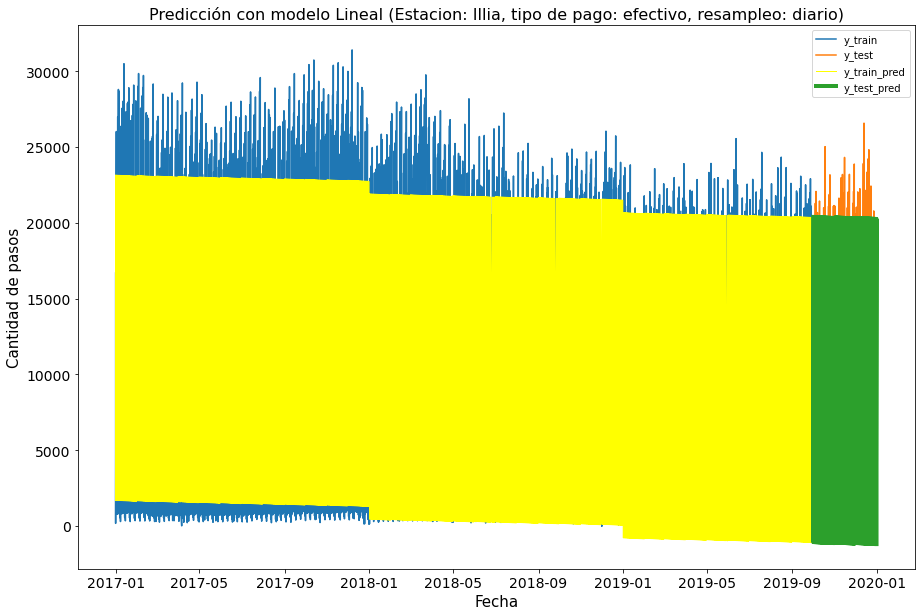

In [ ]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 1)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 4)

#Formato de la gráfica
plt.title('Predicción con modelo Lineal (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn

In [ ]:
def evaluar_modelo(modelo, y_train, y_test, y_train_pred, y_test_pred):

    print('El modelo a evaluar: ', modelo)
    ### CALCULAMOS EL ERROR
    
    rmse_train = round(mean_squared_error(y_train, y_train_pred, squared=False),1)
    rmse_test = round(mean_squared_error(y_test, y_test_pred, squared=False),1)
    
    mape_train = round(100*mean_absolute_error(y_train, y_train_pred),1)
    mape_test = round(100*mean_absolute_error(y_test, y_test_pred),1)

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'Error Absoluto medio en Train: {mape_train}')
    print(f'Error Absoluto medio en Test: {mape_test}\n')
    
        ### GRAFICAMOS LOS RESULTADOS
      
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

El modelo a evaluar:  Lineal regressor
Raíz del error cuadrático medio en Train: 2427.0
Raíz del error cuadrático medio en Test: 2457.6
Error Absoluto medio en Train: 162016.2
Error Absoluto medio en Test: 173301.4



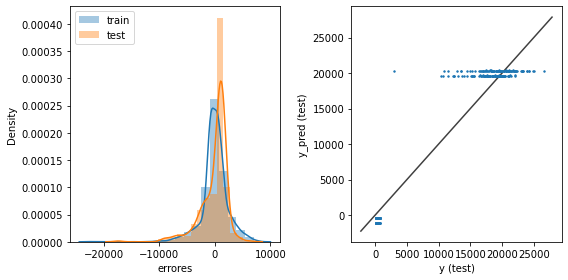

In [ ]:
evaluar_modelo('Lineal regressor', y_train, y_test, y_train_pred, y_test_pred)

## Benchmark Con Resampleo Diario

In [ ]:
diario.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-01-01 to 2019-12-31
Freq: D
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cantidad_pasos  1095 non-null   int64
 1   fecha_num       1095 non-null   int64
dtypes: int64(2)
memory usage: 25.7 KB


In [ ]:
df_train_simple = diario.loc['2017-01-01':'2019-09-30'] 
df_train_simple

,cantidad_pasos,fecha_num
fecha,,
2017-01-01,31183,170092230
2017-01-02,51568,232680596
2017-01-03,51093,226053924
2017-01-04,53332,236362893
2017-01-05,56486,234154212
...,...,...
2019-09-26,43110,70783488
2019-09-27,44985,70046255
2019-09-28,41925,70783680


In [ ]:
df_test_simple = diario.loc['2019-10-01':]
df_test_simple

,cantidad_pasos,fecha_num
fecha,,
2019-10-01,39669,70783968
2019-10-02,34943,70784064
2019-10-03,35054,70784160
2019-10-04,43775,70784256
2019-10-05,45150,70784352
...,...,...
2019-12-27,40182,70792320
2019-12-28,30681,70792416
2019-12-29,26259,70792512


In [ ]:
X_train_simple = df_train_simple[['fecha_num']]
y_train_simple = df_train_simple.cantidad_pasos.values.reshape(-1, 1)
X_test_simple = df_test_simple[['fecha_num']]
y_test_simple = df_test_simple.cantidad_pasos.values.reshape(-1, 1)

In [ ]:
lr_simple = LinearRegression()

In [ ]:
lr_simple.fit(X_train_simple, y_train_simple)

LinearRegression()

In [ ]:
y_train_pred_s = lr_simple.predict(X_train_simple)
y_test_pred_s= lr_simple.predict(X_test_simple)

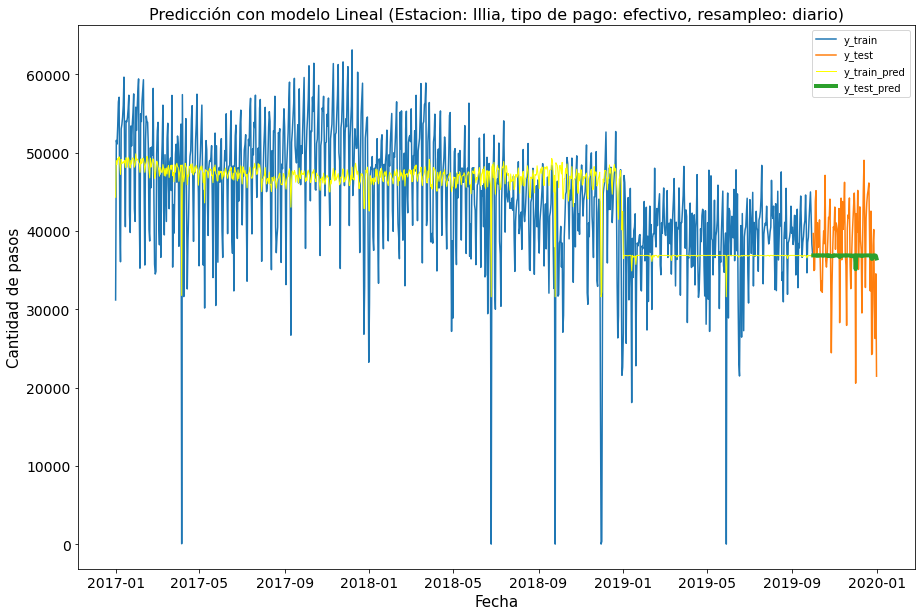

In [ ]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train_simple.index, df_train_simple.cantidad_pasos, label = 'y_train')
plt.plot(df_test_simple.index, df_test_simple.cantidad_pasos, label = 'y_test')
plt.plot(df_train_simple.index, y_train_pred_s, label = 'y_train_pred', color='yellow', lw = 1)
plt.plot(df_test_simple.index, y_test_pred_s, label = 'y_test_pred',  lw = 4)

#Formato de la gráfica
plt.title('Predicción con modelo Lineal (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.legend()

###### Como observamos en el resampleo diario, tenemos una prediccion lineal, y no aparece la franja amarilla que tenemos con los Encodeados

El modelo a evaluar:  Lineal regressor Resampleo Diario
Raíz del error cuadrático medio en Train: 6665.2
Raíz del error cuadrático medio en Test: 5830.4
Error Absoluto medio en Train: 515617.2
Error Absoluto medio en Test: 468316.3



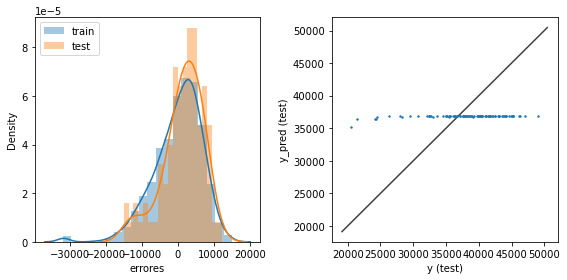

In [ ]:
evaluar_modelo('Lineal regressor Resampleo Diario', y_train_simple, y_test_simple, y_train_pred_s, y_test_pred_s)

###### Si comparamos el error de la regresion lineal solo con la fecha y el que viene con el Encoder, vemos que teniendo en cuenta solo la fecha el error es el doble

# XGBoost

In [ ]:
# Importamos la librería que nos permitirá hacer uso del modelo
import xgboost as xgb

In [ ]:
# Instanciaremos el modelo con sus caracteristicas por defecto
reg = xgb.XGBRegressor()

In [ ]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric= ['mape','rmse'],
        early_stopping_rounds=50,
        verbose=1
       )

[0]	validation_0-mape:0.97249	validation_0-rmse:10923.93457	validation_1-mape:0.67291	validation_1-rmse:9450.33691
[1]	validation_0-mape:0.95577	validation_0-rmse:7808.77978	validation_1-mape:0.51004	validation_1-rmse:6732.87061
[2]	validation_0-mape:0.98765	validation_0-rmse:5680.59570	validation_1-mape:0.42380	validation_1-rmse:4875.88672
[3]	validation_0-mape:1.00567	validation_0-rmse:4250.22266	validation_1-mape:0.37774	validation_1-rmse:3615.79736
[4]	validation_0-mape:1.02808	validation_0-rmse:3327.84473	validation_1-mape:0.35377	validation_1-rmse:2837.13696
[5]	validation_0-mape:1.04354	validation_0-rmse:2745.47730	validation_1-mape:0.34148	validation_1-rmse:2415.72510
[6]	validation_0-mape:1.03898	validation_0-rmse:2406.30859	validation_1-mape:0.33715	validation_1-rmse:2218.50537
[7]	validation_0-mape:1.05246	validation_0-rmse:2205.33057	validation_1-mape:0.33595	validation_1-rmse:2130.59399
[8]	validation_0-mape:1.05798	validation_0-rmse:2082.25513	validation_1-mape:0.33903	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Visualizamos el mejor valor para la métrica de criterio de entrenamiento
reg.best_score

1994.238159

In [ ]:
# Visualizamos cual fue la mejor iteración en la que dicho valor se obtuvo
reg.best_iteration

13

In [ ]:
# Generamos las predicciones para los valores de test y de de train para graficarlas
y_train_pred = reg.predict(X_train)
y_test_pred= reg.predict(X_test)

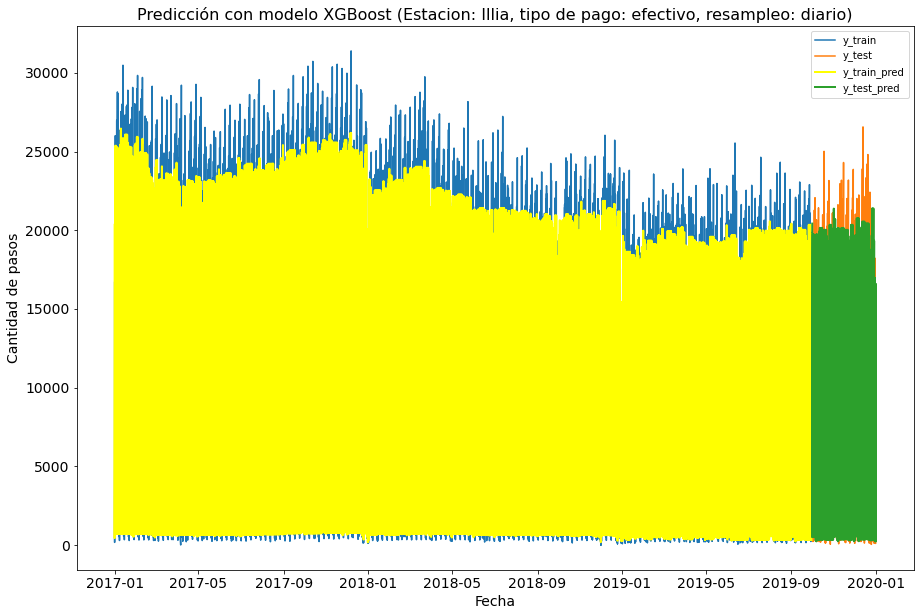

In [ ]:
# Generamos el gráfico de comparación de los valores de entrenamiento y de testeo del modelo
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.tick_params(labelsize=14)
plt.legend()

El modelo a evaluar:  XGBoost
Raíz del error cuadrático medio en Train: 1890.3
Raíz del error cuadrático medio en Test: 1994.2
Error Absoluto medio en Train: 110683.1
Error Absoluto medio en Test: 110219.1



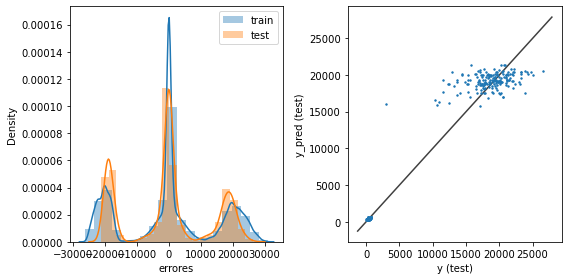

In [ ]:
evaluar_modelo('XGBoost', y_train, y_test, y_train_pred, y_test_pred)

# XGBoost (Optimización)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
param_mios = \
{
'base_score':[0.5],
'booster':['gbtree'], 
'colsample_bylevel':[1],
'colsample_bynode':[1], 
'colsample_bytree':[1], 
'gamma':[0], 
'gpu_id':[-1],
'importance_type':['gain'], 
'interaction_constraints':[''],
'learning_rate':[0.300000012, 0.03], 
'max_delta_step':[0], 
'max_depth':[6,5,4,7,8],
'min_child_weight':[1], 
'missing':[np.nan], 
'monotone_constraints':['()'],
'n_estimators':[100,1000], 
'n_jobs':[0], 
'num_parallel_tree':[1], 
'random_state':[0],
'reg_alpha':[0], 
'reg_lambda':[1], 
'scale_pos_weight':[1], 
'subsample':[1],
'tree_method':['exact'], 
'validate_parameters':[1], 
'verbosity':[1]
}

In [ ]:
rg_rs = RandomizedSearchCV(reg, param_mios,n_iter=100, random_state=0, cv=5,
                            scoring='neg_root_mean_squared_error', verbose=True, n_jobs=-1, refit=True)

In [ ]:
rg_rs.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.5s


[0]	validation_0-rmse:10923.94531	validation_1-rmse:9450.33691
[1]	validation_0-rmse:7814.30225	validation_1-rmse:6732.82080
[2]	validation_0-rmse:5687.79346	validation_1-rmse:4875.83203
[3]	validation_0-rmse:4261.01025	validation_1-rmse:3615.68237
[4]	validation_0-rmse:3346.11060	validation_1-rmse:2854.99561
[5]	validation_0-rmse:2768.46802	validation_1-rmse:2385.75757
[6]	validation_0-rmse:2436.03223	validation_1-rmse:2161.66309
[7]	validation_0-rmse:2248.19019	validation_1-rmse:2074.93677
[8]	validation_0-rmse:2144.28345	validation_1-rmse:2020.59131


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   56.5s finished


[9]	validation_0-rmse:2085.28735	validation_1-rmse:2010.85339
[10]	validation_0-rmse:2051.53735	validation_1-rmse:2012.80811
[11]	validation_0-rmse:2026.44702	validation_1-rmse:2015.39514
[12]	validation_0-rmse:2007.76550	validation_1-rmse:2014.31506
[13]	validation_0-rmse:1997.60107	validation_1-rmse:1984.25378
[14]	validation_0-rmse:1979.09290	validation_1-rmse:1993.64673
[15]	validation_0-rmse:1967.64795	validation_1-rmse:1979.29187
[16]	validation_0-rmse:1956.41565	validation_1-rmse:1994.01807
[17]	validation_0-rmse:1946.24280	validation_1-rmse:1998.32898
[18]	validation_0-rmse:1938.88171	validation_1-rmse:1978.94824
[19]	validation_0-rmse:1923.83386	validation_1-rmse:1990.30676
[20]	validation_0-rmse:1913.14294	validation_1-rmse:1960.10474
[21]	validation_0-rmse:1907.36792	validation_1-rmse:1969.21081
[22]	validation_0-rmse:1895.69959	validation_1-rmse:1970.38660
[23]	validation_0-rmse:1879.56958	validation_1-rmse:1956.79822
[24]	validation_0-rmse:1875.40955	validation_1-rmse:1952

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...
                                        'min_child_weight': [1],
                                        'missing': [nan],
                        

In [ ]:
rg_rs.best_score_

-2459.4098393422614

In [ ]:
rg_rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [ ]:
list(rg_rs.cv_results_.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_verbosity',
 'param_validate_parameters',
 'param_tree_method',
 'param_subsample',
 'param_scale_pos_weight',
 'param_reg_lambda',
 'param_reg_alpha',
 'param_random_state',
 'param_num_parallel_tree',
 'param_n_jobs',
 'param_n_estimators',
 'param_monotone_constraints',
 'param_missing',
 'param_min_child_weight',
 'param_max_depth',
 'param_max_delta_step',
 'param_learning_rate',
 'param_interaction_constraints',
 'param_importance_type',
 'param_gpu_id',
 'param_gamma',
 'param_colsample_bytree',
 'param_colsample_bynode',
 'param_colsample_bylevel',
 'param_booster',
 'param_base_score',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [ ]:
best_score = np.argmax(rg_rs.cv_results_['mean_test_score'])
best_score

2

In [ ]:
print('mean_test_f1', rg_rs.cv_results_['mean_test_score'][best_score])
print('params', rg_rs.cv_results_['params'][best_score])

mean_test_f1 -2459.4098393422614
params {'verbosity': 1, 'validate_parameters': 1, 'tree_method': 'exact', 'subsample': 1, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'random_state': 0, 'num_parallel_tree': 1, 'n_jobs': 0, 'n_estimators': 100, 'monotone_constraints': '()', 'missing': nan, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 0, 'learning_rate': 0.300000012, 'interaction_constraints': '', 'importance_type': 'gain', 'gpu_id': -1, 'gamma': 0, 'colsample_bytree': 1, 'colsample_bynode': 1, 'colsample_bylevel': 1, 'booster': 'gbtree', 'base_score': 0.5}


In [ ]:
y_train_pred = rg_rs.predict(X_train)
y_test_pred= rg_rs.predict(X_test)

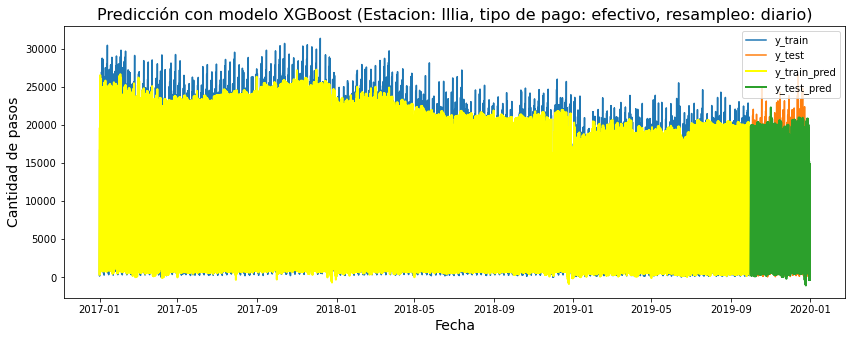

In [ ]:
plt.figure(figsize = (14,5))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.legend()

El modelo a evaluar:  XGBoost_optimizado
Raíz del error cuadrático medio en Train: 1875.4
Raíz del error cuadrático medio en Test: 1952.9
Error Absoluto medio en Train: 108800.7
Error Absoluto medio en Test: 115010.0



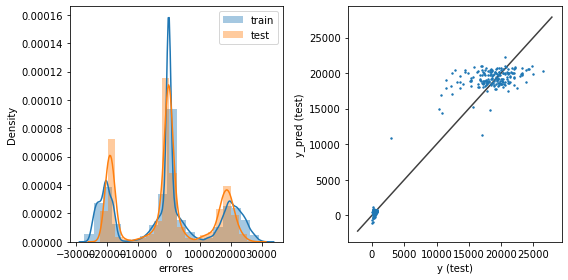

In [ ]:
evaluar_modelo('XGBoost_optimizado', y_train, y_test, y_train_pred, y_test_pred)

##### Este ultimo Modelo "XGBoost_optimizado" es el modelo que nos da el error mas bajo, y el mas optimo.

# Variables mas importantes  para la predicción

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

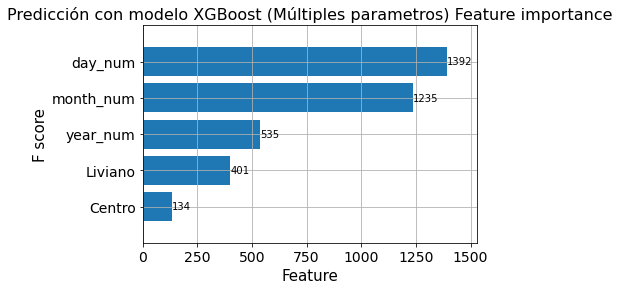

In [ ]:
plot_importance(reg, height=0.8,max_num_features=15)
plt.title('Predicción con modelo XGBoost (Múltiples parametros) Feature importance',fontsize=16)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('F score', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

# Forecast 2020

Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.

Haz todas las transformaciones de datos que consideres necesarias. Justifica.
Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
Elige un modelo benchmark y compara tus resultados con este modelo.
Optimiza los hiperparámetros de tu modelo.
Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?


In [ ]:
diario.head()

,cantidad_pasos,fecha_num
fecha,,
2017-01-01,31183,170092230
2017-01-02,51568,232680596
2017-01-03,51093,226053924
2017-01-04,53332,236362893
2017-01-05,56486,234154212


In [ ]:
#Armamos nuestro dataset para poder buscar la predicción de 2020
df_prophet = diario.reset_index().drop(columns='fecha_num').rename(columns={'fecha':'ds', 'cantidad_pasos':'y'})
df_prophet

,ds,y
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
1090,2019-12-27,40182
1091,2019-12-28,30681
1092,2019-12-29,26259
1093,2019-12-30,34523


In [ ]:
# Omitimos los diferentes warnings que se generan con el uso de las librerias
import warnings
warnings.simplefilter('ignore')

In [ ]:
# Importamos la librería
from fbprophet import Prophet

In [ ]:
# Instanciamos el modelo
prophet_model = Prophet()

In [ ]:
# Entrenamos nuestro modelo con los datos de entrenamiento
prophet_model.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Buscamos las fechas futuras, proceso que solo funciona con Prophet
future = prophet_model.make_future_dataframe(periods=365)
future.tail()

,ds
1455,2020-12-26
1456,2020-12-27
1457,2020-12-28
1458,2020-12-29
1459,2020-12-30


In [ ]:
forecast = prophet_model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,48904.328644,32482.010331,46766.456423,48904.328644,48904.328644,-9838.114041,-9838.114041,-9838.114041,-6826.534011,-6826.534011,-6826.534011,-3011.580031,-3011.580031,-3011.580031,0.0,0.0,0.0,39066.214603
1,2017-01-02,48903.472430,37270.844182,51315.953114,48903.472430,48903.472430,-4248.277828,-4248.277828,-4248.277828,-1086.745399,-1086.745399,-1086.745399,-3161.532430,-3161.532430,-3161.532430,0.0,0.0,0.0,44655.194602
2,2017-01-03,48902.616217,38575.412444,52810.140563,48902.616217,48902.616217,-3237.932028,-3237.932028,-3237.932028,33.726251,33.726251,33.726251,-3271.658279,-3271.658279,-3271.658279,0.0,0.0,0.0,45664.684189
3,2017-01-04,48901.760004,40700.813908,55402.425574,48901.760004,48901.760004,-1409.333571,-1409.333571,-1409.333571,1931.610463,1931.610463,1931.610463,-3340.944034,-3340.944034,-3340.944034,0.0,0.0,0.0,47492.426433
4,2017-01-05,48900.903790,41124.936220,56131.370279,48900.903790,48900.903790,-295.398494,-295.398494,-295.398494,3073.710532,3073.710532,3073.710532,-3369.109026,-3369.109026,-3369.109026,0.0,0.0,0.0,48605.505296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2020-12-26,34614.534624,23046.556327,38127.399004,32833.059223,36434.683953,-3840.586980,-3840.586980,-3840.586980,-2421.487200,-2421.487200,-2421.487200,-1419.099780,-1419.099780,-1419.099780,0.0,0.0,0.0,30773.947643
1456,2020-12-27,34607.309110,18469.576240,33915.662871,32816.635547,36431.034898,-8575.291024,-8575.291024,-8575.291024,-6826.534011,-6826.534011,-6826.534011,-1748.757014,-1748.757014,-1748.757014,0.0,0.0,0.0,26032.018085
1457,2020-12-28,34600.083596,23775.681943,39025.048355,32802.802142,36428.631688,-3145.230719,-3145.230719,-3145.230719,-1086.745399,-1086.745399,-1086.745399,-2058.485320,-2058.485320,-2058.485320,0.0,0.0,0.0,31454.852877
1458,2020-12-29,34592.858082,24613.524020,39838.197006,32789.163781,36431.888783,-2309.866901,-2309.866901,-2309.866901,33.726251,33.726251,33.726251,-2343.593152,-2343.593152,-2343.593152,0.0,0.0,0.0,32282.991182


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1455,2020-12-26,30773.947643,23046.556327,38127.399004
1456,2020-12-27,26032.018085,18469.576240,33915.662871
1457,2020-12-28,31454.852877,23775.681943,39025.048355
1458,2020-12-29,32282.991182,24613.524020,39838.197006
1459,2020-12-30,33917.398773,26092.955356,41704.668557


<Figure size 1080x720 with 0 Axes>

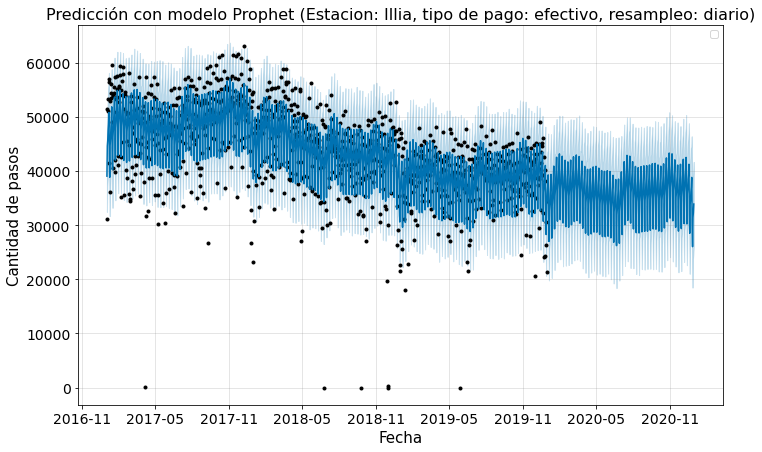

In [ ]:
plt.figure(figsize = (15,10))
prophet_model.plot(forecast)
plt.title('Predicción con modelo Prophet (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend()

Conclusion: La prediccion predice la baja de transito por Illia pagado en eefctivo, en el proximo practico validaremos que paso con 2020 y tambien veremos como afecto la pandemia a nuestras prediciones

In [ ]:
y_test_pred= forecast.yhat.values.reshape(-1, 1)

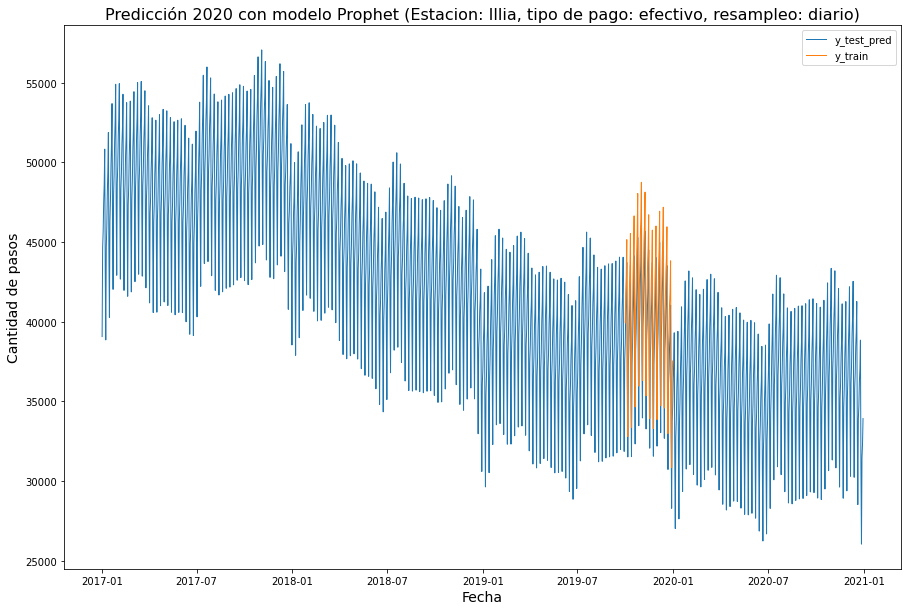

In [ ]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica

plt.plot(future.ds, y_test_pred, label = 'y_test_pred',  lw = 1)
plt.plot(df_train_prophet_forecast.ds, df_train_prophet_forecast.y, label = 'y_train',lw = 1)
#Formato de la gráfica
plt.title('Predicción 2020 con modelo Prophet (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.legend()

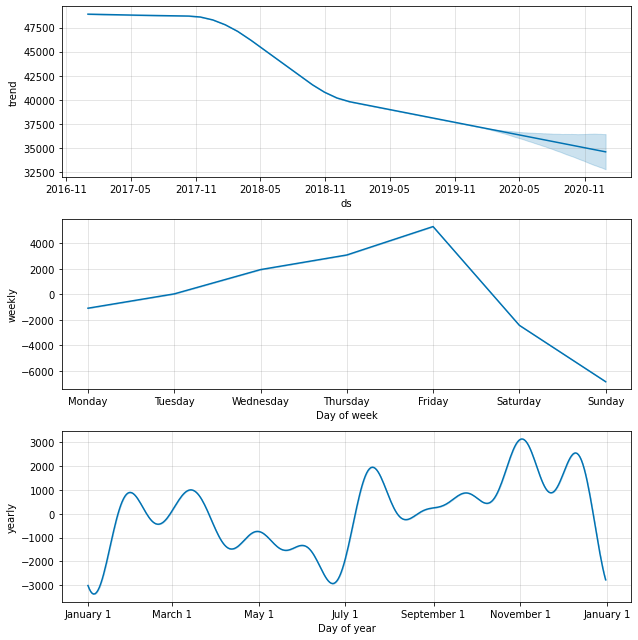

In [ ]:
fig2 = prophet_model.plot_components(forecast,weekly_start=1)

# **Para pensar, investigar y, opcionalmente, implementar**


**¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.?**
Este punto lo aplique con un Encoder, encodeando los feathures que me parecieron importantes, y de poder incorporar mas informacion lo haria con mas encoders, lo cual no hay que exedeser para no terminar realizando un set de datos demasiado grande.

**¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?**
No todas las estaciones tienen el mismos comportamiento , hay varias que se habilitaron en 2019 y tiene poco transito y la mayoria es en efectivo

**¿Hay algo que te gustaría investigar o probar?**
Me gustaria investigar Como afeto la pandemia a el transito en 2020, haciendo una comparacion de su comportamiento versus, los picos de contagios que hubo desde que comenzo todo.

Ademas tengo programado hacer en el informe final redes Neuronales para poder hacer un modelo mas robusto. Y tal vez poder hacer un mix de Redes dependiendo del feathure mas fuerte en cada caso.
[Fuente De Redes Neuronales en Series de Tiempo ](https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/)